<a href="https://colab.research.google.com/github/SYCHOSY/Data-Science/blob/master/5_4_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers 
import matplotlib.pyplot as plt
import numpy as np
import math
keras.__version__

'2.5.0'

In [4]:
(x_train, y_train), (x_test,y_test) = keras.datasets.mnist.load_data(path="mnist.npz")

In [6]:
input_x = layers.Input(shape=(28,28), name ='input')
x0 = layers.Flatten(name='flatten')(input_x)
x1 = layers.Dense(32)(x0)
x11 = layers.BatchNormalization()(x1)
x2 = layers.Activation('relu', name ='relu')(x11)
x3 = layers.Dense(10)(x2)
x31 = layers.BatchNormalization()(x3)
output_x = layers.Activation('softmax', name = 'softmax')(x31)

model = keras.Model(inputs=input_x, outputs=output_x, name='model_1')
model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history1 = model.fit(x_train[:5000], y_train[:5000], epochs=20, batch_size=2,validation_data=(x_test[:2000],y_test[:2000]))

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                25120     
_________________________________________________________________
batch_normalization_2 (Batch (None, 32)                128       
_________________________________________________________________
relu (Activation)            (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
_________________________________________________________________
batch_normalization_3 (Batch (None, 10)                40  

In [7]:
# 모델 정의
# 1. DataFlow(Graph)정의
input_x = layers.Input(shape=(28,28), name='input') 
x0 = layers.Flatten(name='flatten')(input_x)    
x1 = layers.Dense(32)(x0)  
x11= layers.LayerNormalization()(x1)
x2 = layers.Activation('relu', name='relu')(x11) 
x3 = layers.Dense(10)(x2)    
x31= layers.LayerNormalization()(x3)
output_x = layers.Activation('softmax', name='softmax')(x31)

# 2. 모델 인스턴스 : input,output으로 DataFlow를 추적
model = keras.Model(inputs=input_x, outputs=output_x, name='model_1')
model.summary() 

# 학습과정 설정 
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) 
# 학습 
history2 = model.fit(x_train[:5000], y_train[:5000], epochs=20, batch_size=2, validation_data=(x_test[:2000],y_test[:2000])) 

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                25120     
_________________________________________________________________
layer_normalization (LayerNo (None, 32)                64        
_________________________________________________________________
relu (Activation)            (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                330       
_________________________________________________________________
layer_normalization_1 (Layer (None, 10)                20  

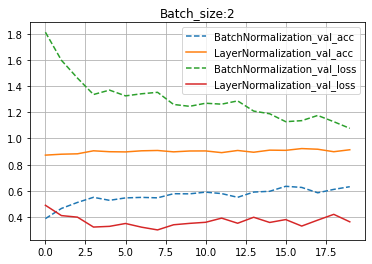

In [8]:
import matplotlib.pylab as plt

plt.plot(history1.history['val_accuracy'], linestyle='--', label="BatchNormalization_val_acc")
plt.plot(history2.history['val_accuracy'], linestyle='-', label="LayerNormalization_val_acc")
plt.plot(history1.history['val_loss'], linestyle='--', label="BatchNormalization_val_loss")
plt.plot(history2.history['val_loss'], linestyle='-', label="LayerNormalization_val_loss")
plt.title("Batch_size:2")
#plt.ylim(0.1, 1)
plt.legend()
plt.grid()
plt.show() 

In [9]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras.layers import MaxPool2D, MaxPool1D
from tensorflow.keras.layers import Dropout, BatchNormalization

In [10]:
data_set = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = data_set.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [13]:
x_train.shape

(60000, 28, 28)

In [14]:
x_train, x_test = x_train /255.0, x_test /255.0
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

In [20]:
x_train.shape

(60000, 28, 28, 1)

In [22]:
type(x_train)

numpy.ndarray

In [23]:
### Basic model 
def model_cnn_basic():
    model = keras.models.Sequential()
    # conv 1
    model.add(Conv2D(32,3,padding='same',activation='relu',input_shape=(28,28,1)))
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
    # conv 2
    model.add(Conv2D(64, 3, padding='same', activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
    # conv 3
    model.add(Conv2D(32, 3, padding='same', activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
    # Dense layers
    model.add(Flatten(name='flatten'))
    model.add(Dense(10, activation='softmax', name='dense_10'))
    return model

model1 = model_cnn_basic()
model2 = model_cnn_basic()

model1.summary()  

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 32)          18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 288)               0

In [24]:
starter_learning_rate = 0.001
decay_steps = 60
decay_rate=0.3

def exponential_decay(step):
    lr = starter_learning_rate * decay_rate ** (step // decay_steps)
#    print(f'{lr:0.5f}')
    return lr

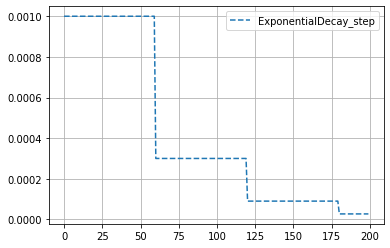

In [25]:
lr_s=[]
for step in range(200):
    lr_s.append(exponential_decay(step))

plt.plot(lr_s, linestyle='--', label="ExponentialDecay_step")
plt.legend()
plt.grid()
plt.show()

In [26]:
model1 = model_cnn_basic()
model1.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])
history1 = model1.fit(x_train[0:5000],y_train[0:5000], epochs=200, batch_size=1024, verbose=2,
          validation_data=(x_test[0:2000], y_test[0:2000])) 

Epoch 1/200
5/5 - 27s - loss: 2.1380 - acc: 0.3164 - val_loss: 1.8669 - val_acc: 0.3965
Epoch 2/200
5/5 - 0s - loss: 1.6330 - acc: 0.5018 - val_loss: 1.4148 - val_acc: 0.5305
Epoch 3/200
5/5 - 0s - loss: 1.2734 - acc: 0.5640 - val_loss: 1.2120 - val_acc: 0.5250
Epoch 4/200
5/5 - 0s - loss: 1.1129 - acc: 0.5746 - val_loss: 1.0313 - val_acc: 0.6635
Epoch 5/200
5/5 - 0s - loss: 1.0154 - acc: 0.6348 - val_loss: 0.9181 - val_acc: 0.6750
Epoch 6/200
5/5 - 0s - loss: 0.8355 - acc: 0.7122 - val_loss: 0.9530 - val_acc: 0.6395
Epoch 7/200
5/5 - 0s - loss: 0.9243 - acc: 0.6508 - val_loss: 0.8519 - val_acc: 0.6900
Epoch 8/200
5/5 - 0s - loss: 0.8336 - acc: 0.6960 - val_loss: 0.9231 - val_acc: 0.6605
Epoch 9/200
5/5 - 0s - loss: 0.7899 - acc: 0.7082 - val_loss: 0.7839 - val_acc: 0.7080
Epoch 10/200
5/5 - 0s - loss: 0.7409 - acc: 0.7266 - val_loss: 0.7962 - val_acc: 0.6905
Epoch 11/200
5/5 - 0s - loss: 0.7771 - acc: 0.7148 - val_loss: 0.7175 - val_acc: 0.7525
Epoch 12/200
5/5 - 0s - loss: 0.7147 - a

In [27]:
model2 = model_cnn_basic()

model2.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

my_callbacks = [
    keras.callbacks.LearningRateScheduler(exponential_decay),
             ]
history2 = model2.fit(x_train[0:5000],y_train[0:5000], epochs=200, batch_size=1024, callbacks=my_callbacks, verbose=2,
          validation_data=(x_test[0:2000], y_test[0:2000])) 

Epoch 1/200
5/5 - 1s - loss: 2.1697 - acc: 0.2866 - val_loss: 1.8808 - val_acc: 0.5545
Epoch 2/200
5/5 - 0s - loss: 1.6422 - acc: 0.5242 - val_loss: 1.4163 - val_acc: 0.5025
Epoch 3/200
5/5 - 0s - loss: 1.2849 - acc: 0.5670 - val_loss: 1.0977 - val_acc: 0.6725
Epoch 4/200
5/5 - 0s - loss: 1.0556 - acc: 0.6422 - val_loss: 1.0847 - val_acc: 0.5690
Epoch 5/200
5/5 - 0s - loss: 0.9679 - acc: 0.6630 - val_loss: 0.9311 - val_acc: 0.6495
Epoch 6/200
5/5 - 0s - loss: 0.8843 - acc: 0.6894 - val_loss: 0.8971 - val_acc: 0.6695
Epoch 7/200
5/5 - 0s - loss: 0.8581 - acc: 0.6714 - val_loss: 0.8099 - val_acc: 0.7190
Epoch 8/200
5/5 - 0s - loss: 0.7540 - acc: 0.7416 - val_loss: 0.8225 - val_acc: 0.6805
Epoch 9/200
5/5 - 0s - loss: 0.7889 - acc: 0.7156 - val_loss: 0.7938 - val_acc: 0.6970
Epoch 10/200
5/5 - 0s - loss: 0.7376 - acc: 0.7340 - val_loss: 0.7720 - val_acc: 0.7225
Epoch 11/200
5/5 - 0s - loss: 0.7473 - acc: 0.7202 - val_loss: 0.7761 - val_acc: 0.7015
Epoch 12/200
5/5 - 0s - loss: 0.7262 - ac

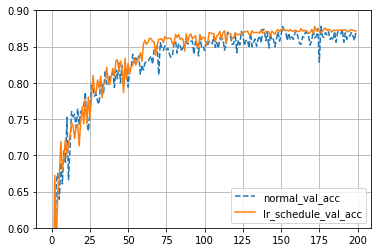

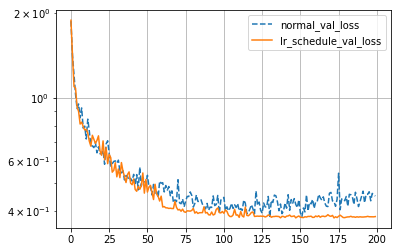

In [28]:
plt.plot(history1.history['val_acc'], linestyle='--', label="normal_val_acc")
plt.plot(history2.history['val_acc'], linestyle='-', label="lr_schedule_val_acc")
plt.ylim(0.6, 0.9)
plt.legend()
plt.grid()
plt.show() 

plt.plot(history1.history['val_loss'], linestyle='--', label="normal_val_loss")
plt.plot(history2.history['val_loss'], linestyle='-', label="lr_schedule_val_loss")
plt.semilogy()
plt.legend()
plt.grid()
plt.show() 